Epoch 1/50
4/4 [==============================] - 1s 61ms/step - loss: 0.0991 - val_loss: 0.0244 - lr: 0.0010
Epoch 2/50
4/4 [==============================] - 0s 12ms/step - loss: 0.0585 - val_loss: 0.0195 - lr: 0.0010
Epoch 3/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0309 - val_loss: 0.0137 - lr: 0.0010
Epoch 4/50
4/4 [==============================] - 0s 12ms/step - loss: 0.0272 - val_loss: 0.0458 - lr: 0.0010
Epoch 5/50
4/4 [==============================] - 0s 12ms/step - loss: 0.0278 - val_loss: 0.0141 - lr: 0.0010
Epoch 6/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0175 - val_loss: 0.0333 - lr: 0.0010
Epoch 7/50
4/4 [==============================] - 0s 12ms/step - loss: 0.0198 - val_loss: 0.0141 - lr: 0.0010
Epoch 8/50
4/4 [==============================] - 0s 12ms/step - loss: 0.0158 - val_loss: 0.0167 - lr: 0.0010
Epoch 9/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0139 - val_loss: 0.0212 - lr: 5.0000e-04
Epoch 

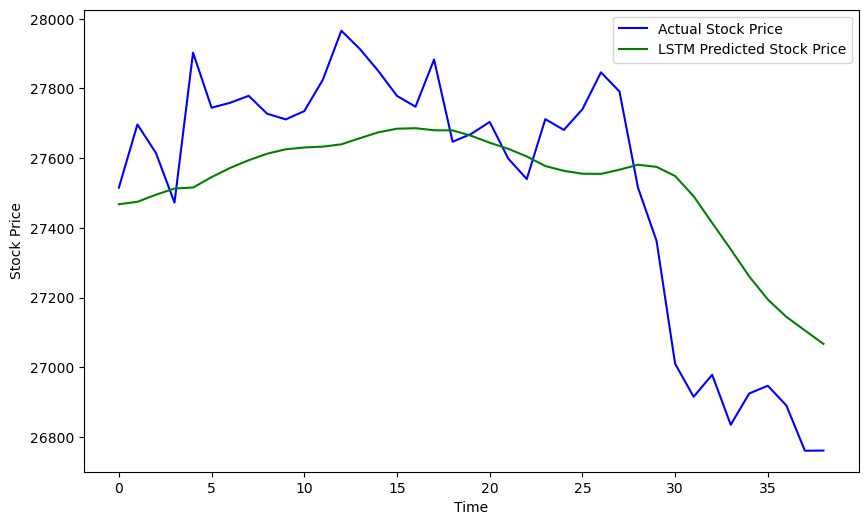

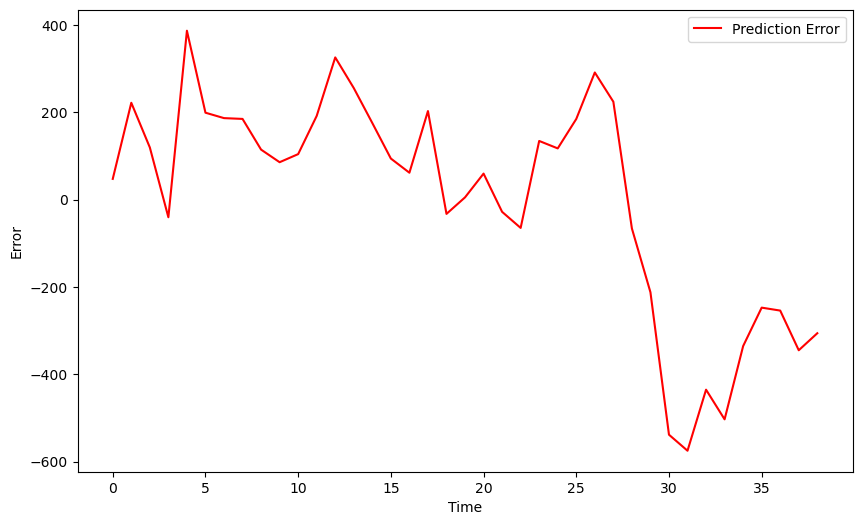

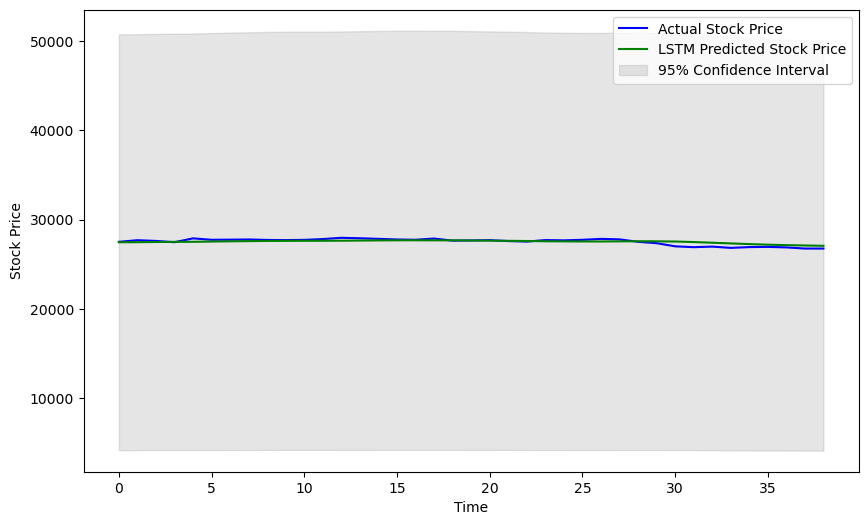

Epoch 1/50
4/4 [==============================] - 1s 67ms/step - loss: 0.1713 - val_loss: 0.0171 - lr: 0.0010
Epoch 2/50
4/4 [==============================] - 0s 19ms/step - loss: 0.0957 - val_loss: 0.1190 - lr: 0.0010
Epoch 3/50
4/4 [==============================] - 0s 20ms/step - loss: 0.1019 - val_loss: 0.0068 - lr: 0.0010
Epoch 4/50
4/4 [==============================] - 0s 20ms/step - loss: 0.0794 - val_loss: 0.0181 - lr: 0.0010
Epoch 5/50
4/4 [==============================] - 0s 23ms/step - loss: 0.0498 - val_loss: 0.0189 - lr: 0.0010
Epoch 6/50
4/4 [==============================] - 0s 24ms/step - loss: 0.0511 - val_loss: 0.0176 - lr: 0.0010
Epoch 7/50
4/4 [==============================] - 0s 23ms/step - loss: 0.0451 - val_loss: 0.0080 - lr: 0.0010
Epoch 8/50
4/4 [==============================] - 0s 24ms/step - loss: 0.0403 - val_loss: 0.0082 - lr: 0.0010
Epoch 9/50
4/4 [==============================] - 0s 34ms/step - loss: 0.0244 - val_loss: 0.0101 - lr: 5.0000e-04
Epoch 

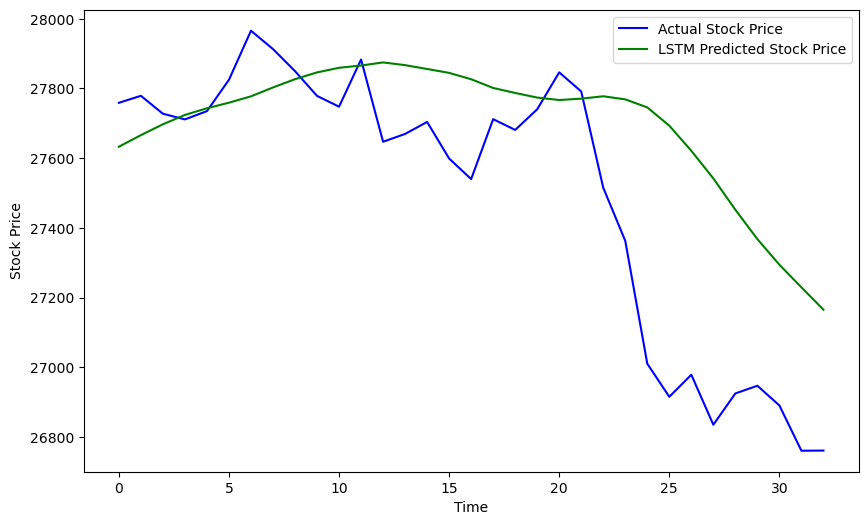

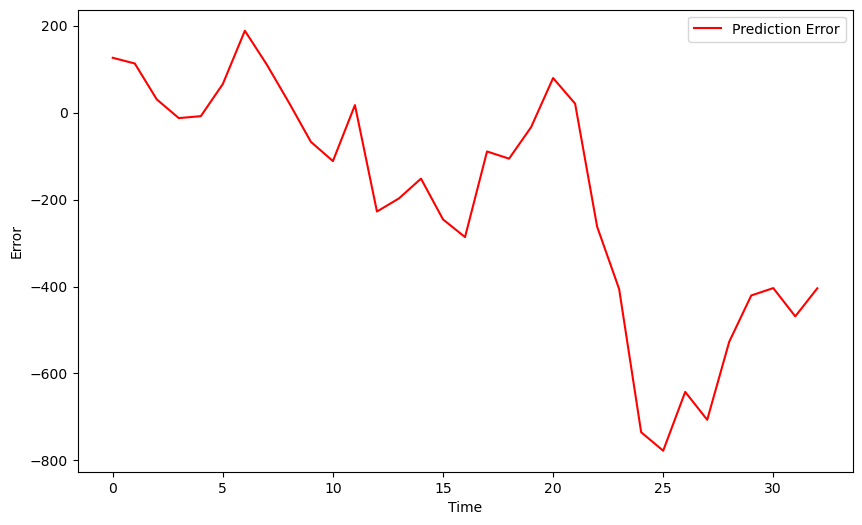

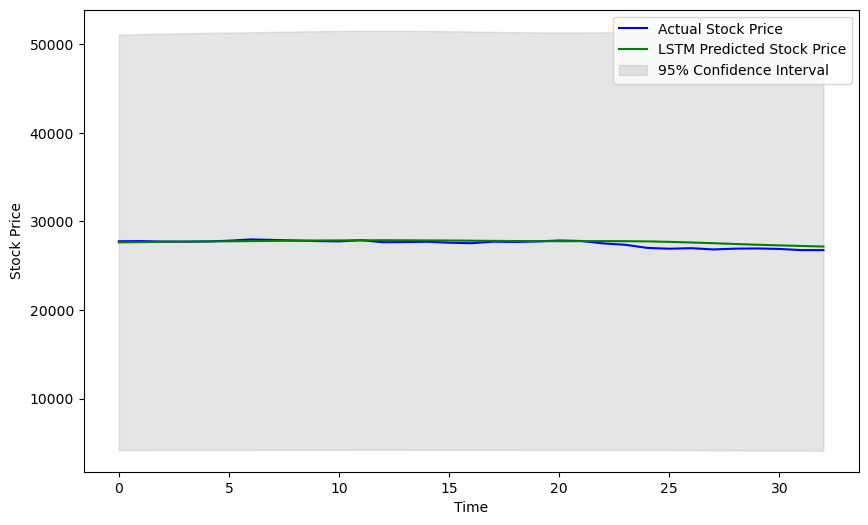

Epoch 1/50
3/3 [==============================] - 1s 95ms/step - loss: 0.7788 - val_loss: 0.0761 - lr: 0.0010
Epoch 2/50
3/3 [==============================] - 0s 23ms/step - loss: 0.2586 - val_loss: 0.0320 - lr: 0.0010
Epoch 3/50
3/3 [==============================] - 0s 28ms/step - loss: 0.1265 - val_loss: 0.0970 - lr: 0.0010
Epoch 4/50
3/3 [==============================] - 0s 30ms/step - loss: 0.1554 - val_loss: 0.0850 - lr: 0.0010
Epoch 5/50
3/3 [==============================] - 0s 29ms/step - loss: 0.1164 - val_loss: 0.0077 - lr: 0.0010
Epoch 6/50
3/3 [==============================] - 0s 31ms/step - loss: 0.0824 - val_loss: 0.0106 - lr: 0.0010
Epoch 7/50
3/3 [==============================] - 0s 30ms/step - loss: 0.1004 - val_loss: 0.0107 - lr: 0.0010
Epoch 8/50
3/3 [==============================] - 0s 31ms/step - loss: 0.0629 - val_loss: 0.0070 - lr: 0.0010
Epoch 9/50
3/3 [==============================] - 0s 45ms/step - loss: 0.0576 - val_loss: 0.0131 - lr: 0.0010
Epoch 10/5

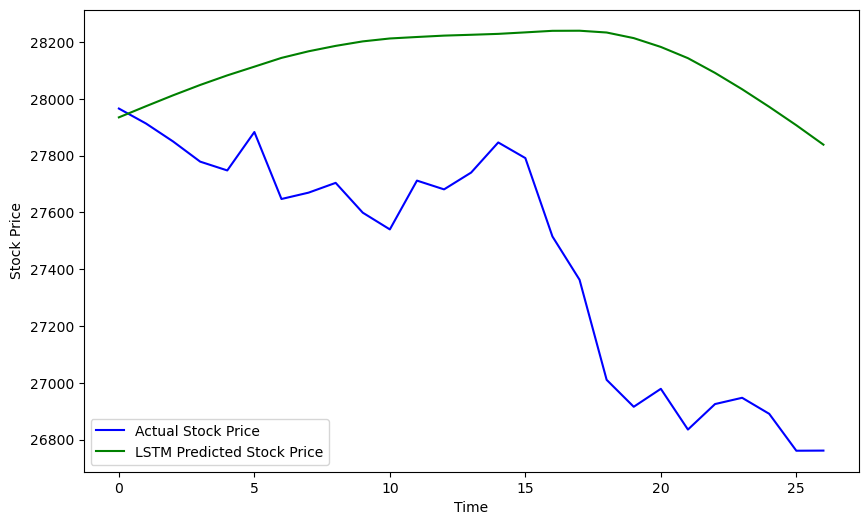

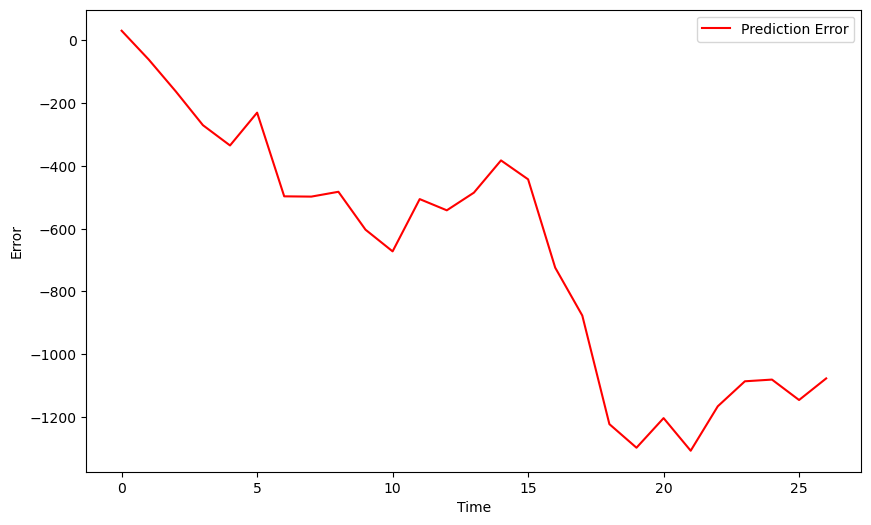

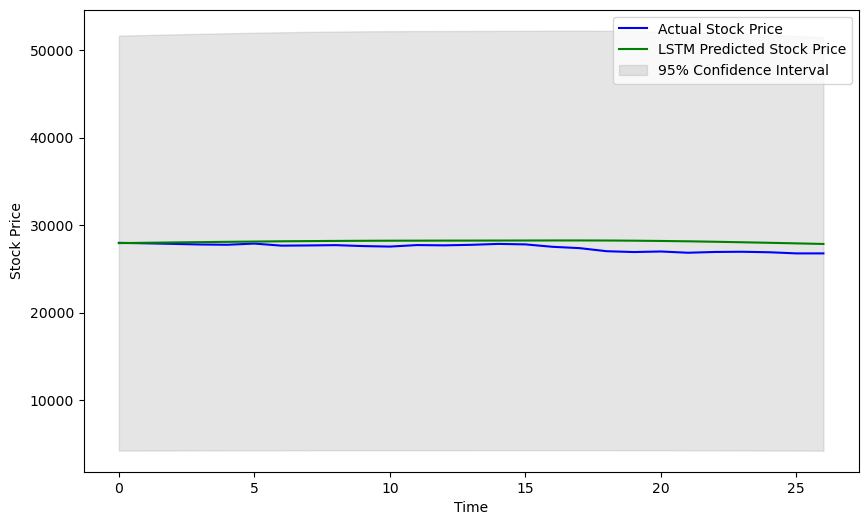

In [42]:
# 必要なライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Dropout, Bidirectional, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Attention

# 1. データの読み込みと前処理
# CSVファイルから株価データを読み込みます
df = pd.read_csv('japan_2022.csv')

# 'Close' 列（終値）を抽出
prices = df['Close'].values

# データのスケーリング（0から1の範囲に正規化）
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices.reshape(-1, 1))

# 移動平均を特徴量に追加
df['SMA_5'] = df['Close'].rolling(window=5).mean()
df['SMA_20'] = df['Close'].rolling(window=20).mean()

# 欠損値を削除
df = df.dropna()

# 再度スケーリング
prices = df['Close'].values
sma_5 = df['SMA_5'].values
sma_20 = df['SMA_20'].values
scaled_prices = scaler.fit_transform(prices.reshape(-1, 1))
scaled_sma_5 = scaler.fit_transform(sma_5.reshape(-1, 1))
scaled_sma_20 = scaler.fit_transform(sma_20.reshape(-1, 1))

# シーケンスデータの作成関数
# 過去のn日間のデータを使って、次の日の価格を予測するためのデータを準備します
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

# シーケンスの長さを変更してみる（例: 過去30日間、90日間）
sequence_lengths = [30, 60, 90]

# データの作成
for sequence_length in sequence_lengths:
    # 特徴量とターゲットを作成
    X, y = create_sequences(scaled_prices, sequence_length)
    X_sma_5, _ = create_sequences(scaled_sma_5, sequence_length)
    X_sma_20, _ = create_sequences(scaled_sma_20, sequence_length)

    # 特徴量を結合
    X = np.concatenate([X, X_sma_5, X_sma_20], axis=-1)

    # トレーニングデータとテストデータに分割します
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # 2. RNNアーキテクチャの多様化
    # 各モデルの評価結果を格納するリスト
    results = []

    # 早期停止と学習率減衰のコールバックを設定
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

    # 2.1 SimpleRNNのバリエーション
    model_simple_rnn = Sequential()
    model_simple_rnn.add(SimpleRNN(100, activation='tanh', input_shape=(sequence_length, 3)))
    model_simple_rnn.add(Dropout(0.2))
    model_simple_rnn.add(Dense(1))

    model_simple_rnn.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2,
                                              callbacks=[early_stopping, lr_scheduler])
    test_loss_simple_rnn = model_simple_rnn.evaluate(X_test, y_test)
    results.append(('SimpleRNN', sequence_length, test_loss_simple_rnn))

    # 2.2 LSTM
    model_lstm = Sequential()
    model_lstm.add(LSTM(100, activation='tanh', input_shape=(sequence_length, 3)))
    model_lstm.add(Dropout(0.2))
    model_lstm.add(Dense(1))

    model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    history_lstm = model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2,
                                  callbacks=[early_stopping, lr_scheduler])
    test_loss_lstm = model_lstm.evaluate(X_test, y_test)
    results.append(('LSTM', sequence_length, test_loss_lstm))

    # 2.3 GRU
    model_gru = Sequential()
    model_gru.add(GRU(100, activation='tanh', input_shape=(sequence_length, 3)))
    model_gru.add(Dropout(0.2))
    model_gru.add(Dense(1))

    model_gru.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    history_gru = model_gru.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2,
                                callbacks=[early_stopping, lr_scheduler])
    test_loss_gru = model_gru.evaluate(X_test, y_test)
    results.append(('GRU', sequence_length, test_loss_gru))

    # 2.4 多層RNN（LSTMとGRUの組み合わせ）
    model_multi_rnn = Sequential()
    model_multi_rnn.add(LSTM(50, activation='tanh', return_sequences=True, input_shape=(sequence_length, 3)))
    model_multi_rnn.add(GRU(50, activation='tanh'))
    model_multi_rnn.add(Dropout(0.2))
    model_multi_rnn.add(Dense(1))

    model_multi_rnn.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    history_multi_rnn = model_multi_rnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2,
                                            callbacks=[early_stopping, lr_scheduler])
    test_loss_multi_rnn = model_multi_rnn.evaluate(X_test, y_test)
    results.append(('MultiRNN', sequence_length, test_loss_multi_rnn))

    # 5. モデルの改良

    # 5.1 Attention MechanismをLSTMモデルに追加
    class AttentionLayer(tf.keras.layers.Layer):
        def __init__(self, **kwargs):
            super(AttentionLayer, self).__init__(**kwargs)

        def build(self, input_shape):
            self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], input_shape[-1]), initializer="random_normal", trainable=True)
            self.b = self.add_weight(name="att_bias", shape=(input_shape[-1],), initializer="random_normal", trainable=True)
            super(AttentionLayer, self).build(input_shape)

        def call(self, x):
            e = tf.keras.activations.tanh(tf.tensordot(x, self.W, axes=1) + self.b)
            a = tf.keras.activations.softmax(e, axis=1)
            output = x * a
            return tf.reduce_sum(output, axis=1)

    model_attention = Sequential()
    model_attention.add(LSTM(100, activation='tanh', return_sequences=True, input_shape=(sequence_length, 3)))
    model_attention.add(AttentionLayer())
    model_attention.add(Dropout(0.2))
    model_attention.add(Dense(1))

    model_attention.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    history_attention = model_attention.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2,
                                            callbacks=[early_stopping, lr_scheduler])
    test_loss_attention = model_attention.evaluate(X_test, y_test)
    results.append(('Attention LSTM', sequence_length, test_loss_attention))

    # 5.2 Bidirectional RNN
    model_bidirectional = Sequential()
    model_bidirectional.add(Bidirectional(LSTM(100, activation='tanh'), input_shape=(sequence_length, 3)))
    model_bidirectional.add(Dropout(0.2))
    model_bidirectional.add(Dense(1))

    model_bidirectional.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    history_bidirectional = model_bidirectional.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2,
                                                    callbacks=[early_stopping, lr_scheduler])
    test_loss_bidirectional = model_bidirectional.evaluate(X_test, y_test)
    results.append(('Bidirectional LSTM', sequence_length, test_loss_bidirectional))

    # 7. エンコーダ・デコーダモデル
    # エンコーダ
    encoder_inputs = Input(shape=(sequence_length, 3))
    encoder_lstm = LSTM(100, return_state=True)
    encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)
    encoder_states = [state_h, state_c]

    # デコーダ
    decoder_inputs = Input(shape=(1, 3))  # 1タイムステップのみ予測
    decoder_lstm = LSTM(100, return_sequences=True, return_state=True)
    decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
    decoder_dense = Dense(1)
    decoder_outputs = decoder_dense(decoder_outputs)

    # エンコーダ・デコーダモデルの定義
    model_seq2seq = Model([encoder_inputs, decoder_inputs], decoder_outputs)

    model_seq2seq.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    history_seq2seq = model_seq2seq.fit([X_train, X_train[:, -1, :].reshape(-1, 1, 3)], y_train.reshape(-1, 1, 1), epochs=50, batch_size=32, validation_split=0.2,
                                        callbacks=[early_stopping, lr_scheduler])
    test_loss_seq2seq = model_seq2seq.evaluate([X_test, X_test[:, -1, :].reshape(-1, 1, 3)], y_test.reshape(-1, 1, 1))
    results.append(('Seq2Seq', sequence_length, test_loss_seq2seq))

    # 8. アンサンブル学習
    # 各モデルの予測をアンサンブルして平均を取ります
    predictions_simple_rnn = model_simple_rnn.predict(X_test)
    predictions_lstm = model_lstm.predict(X_test)
    predictions_gru = model_gru.predict(X_test)
    predictions_multi_rnn = model_multi_rnn.predict(X_test)

    # アンサンブルの予測
    ensemble_predictions = (predictions_simple_rnn + predictions_lstm + predictions_gru + predictions_multi_rnn) / 4
    ensemble_loss = np.mean((ensemble_predictions - y_test.reshape(-1, 1))**2)
    results.append(('Ensemble', sequence_length, ensemble_loss))

    # 結果の表示
    print(f"Results for sequence length {sequence_length}:")
    for model_name, seq_len, loss in results:
        print(f"Model: {model_name}, Sequence Length: {seq_len}, Test Loss: {loss}")

    # 予測結果のプロット（例としてLSTMの予測をプロット）
    predictions_lstm = scaler.inverse_transform(predictions_lstm)
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

    plt.figure(figsize=(10, 6))
    plt.plot(y_test_actual, color='blue', label='Actual Stock Price')
    plt.plot(predictions_lstm, color='green', label='LSTM Predicted Stock Price')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

    # 10. 結果の可視化と解釈
    # 誤差分析: 予測と実際の価格との差をプロット
    errors = y_test_actual - predictions_lstm
    plt.figure(figsize=(10, 6))
    plt.plot(errors, color='red', label='Prediction Error')
    plt.xlabel('Time')
    plt.ylabel('Error')
    plt.legend()
    plt.show()

    # 予測の信頼区間
    # ここでは単純に標準偏差を利用して信頼区間を計算します
    predictions_std = np.std([predictions_simple_rnn, predictions_lstm, predictions_gru, predictions_multi_rnn], axis=0)
    confidence_interval = 1.96 * predictions_std

    plt.figure(figsize=(10, 6))
    plt.plot(y_test_actual, color='blue', label='Actual Stock Price')
    plt.plot(predictions_lstm, color='green', label='LSTM Predicted Stock Price')
    plt.fill_between(range(len(y_test_actual)), predictions_lstm[:, 0] - confidence_interval[:, 0], predictions_lstm[:, 0] + confidence_interval[:, 0], color='gray', alpha=0.2, label='95% Confidence Interval')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()
